# news recommendation

In [16]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### pre processing

In [17]:
import json

with open('../data/news_bcp.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

#data

In [18]:
news = list(data.keys())
setences = []
for new in news:
    setence = " ".join(data[new]["keywords"]) # set
    setences.append(setence)

### "clusters"

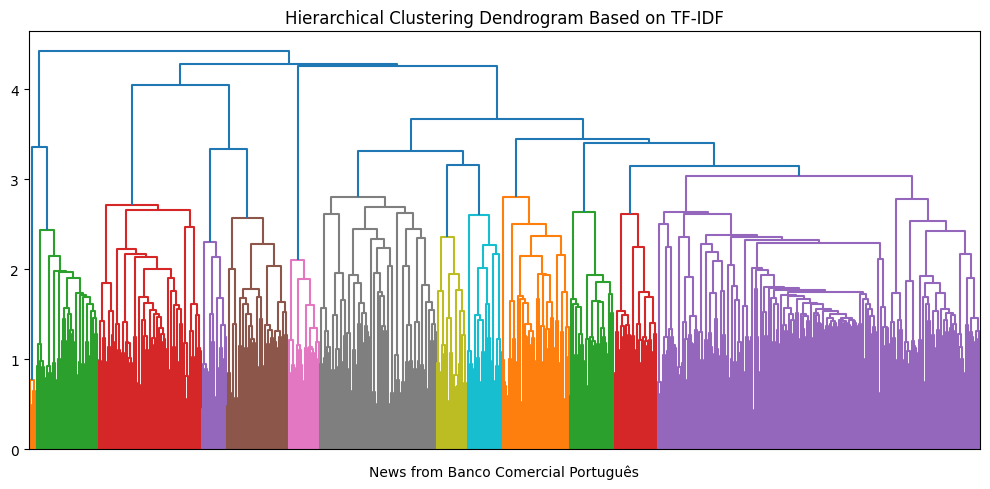

In [19]:
# Initialize with a 3-star rating for each text
ratings = np.array([3.0] * len(setences))

# Initialize TfidfVectorizer (you can limit vocabulary to your keywords if needed)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(setences)

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(tfidf_matrix.toarray(), method='ward')
#print(linked)

plt.figure(figsize=(10, 5))
dendrogram(linked, labels=range(0, len(setences)), leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram Based on TF-IDF')
plt.xlabel('News from Banco Comercial Português')
plt.gca().set_xticklabels([])
plt.tight_layout()
#plt.savefig('newsDendrogram.svg', transparent=True)
plt.show()

In [20]:
from scipy.cluster.hierarchy import fcluster

# Extract clusters by setting a distance threshold
threshold = 2.8  # Adjust based on your dendrogram
clusters = fcluster(linked, t=threshold, criterion='distance')

print("Cluster assignments:", clusters)


Cluster assignments: [14 14 14 14 14 14 14 14 14 13 14 13 13  5  7 14 14 14  5 14  5  5 13 13
 13 13 14 13 14 13 13 13 13 13 14 13 14 13 13 13 13 13 14 13 14 14 14  9
  9  9 14 14  9  9  7 14 14  5  3  3  3 14 14  1 14 14  1  1 14 12  3 14
 14 12 12 12 12 14 12 12  5 12 12 12 12 12 12 12 12 12 12 12  5 12  3 12
 12 14  1  3  1  1 14 14  7  1 14 12 12 12 14  5  5  7  5 14  5  2  2 12
  2  2  2  7 14 14  2  2  2  2  2  2  2  2  5 12 12 12  3  7  7  7 15  2
  7  7  7  7  7  3  3  7  3 14 14 14  3  5  5  5  5  6  3  3  5  3  3  3
  6  3  3  3  6  6  6  6  6  6  6 12  6  6 12 12 14 12 14  2  2 14  7 14
  5  5  2  2  2  5  5  7  2  2  7  7  2 14  2  2  4  2  2  2  2  2  2  5
  7  5  5  7 14  5  5  5  5  5  7  5  5  7  7  2  2  2  7  7  2  4  5  7
  5  5  5  5  7  7  7  3 14  5  5  3 12 12 12 14  3 14 11 12  2  2  2  2
 14  2  2  2  2  2 14 14  2 14  2  3  5  5  5 14  2  2  2  2  2 14  6 14
  6  6  3  3  2  5  3 12  3  3  3  3  3  3  3  3 14  3  5 14  3  3  3 13
  3  2  5  3 14 14  3  3  3 14

In [21]:
from collections import defaultdict

# Group sentences by cluster
cluster_dict = defaultdict(list)
for idx, cluster_id in enumerate(clusters):
    cluster_dict[cluster_id].append(setences[idx])

# Display clusters
for cluster_id, cluster_sentences in cluster_dict.items():
    print(f"\nCluster {cluster_id}:")
    for sentence in cluster_sentences:
        print(f"  {sentence}")



Cluster 14:
  Wall Street World Trade Center Newark terça-feira de Lisboa Newark Estados Unidos Halifax Canadá EUA EUA EUA Portugal Governo Suécia Estocolmo Estado Governo Nova Iorque Avenida Manhattan EUA EUA Estados Unidos Amoreiras Amoreiras Lisboa PSP EUA EUA Lisboa EUA Sociedade de Geografia Alemanha Jornais Ilhas Kennedy Space Center Florida Washington Washington EUA Finanças Frankfurt Nova Iorque EUA Net EUA Voo TAP O consulado português Grande Oriente Lusitano PCTP PCTP Brigada de Inactivação de Agentes Explosivos Dois colaboradores da A assembleia Wim Duisenberg Frasier Frasier Banco Comercial Português TAP ICEP GOL MRPP MRPP PCP Comissão Política do Comité Central PSP Protecção Civil Serviço Nacional de Protecção Civil UE National Geographic de luto National Geographic TAP NASA FMI FMI FMI Banco Mundial BCE Banco Central Europeu BCE Sapo Bola SA William McGlynn Jorge Sampaio Goran Person António Guterres Eugénio de Oliveira Falso Nick Nichols Michael Fay Hans Eichel David An